### A MNIST-like fashion product database

In this, we classify the images into respective classes given in the dataset. We use a Neural Net and a Deep Neural Net in Keras to solve this and check the accuracy scores.

### Load tensorflow

In [31]:
import tensorflow as tf
#tf.set_random_seed(42)

In [32]:
tf.__version__

'2.1.0'

### Collect Data

In [33]:
import keras

In [34]:
(trainX, trainY), (testX, testY) = keras.datasets.fashion_mnist.load_data()

In [35]:
print(testY[0:5])

[9 2 1 1 6]


### Convert both training and testing labels into one-hot vectors.

**Hint:** check **tf.keras.utils.to_categorical()**

In [37]:
trainY = tf.keras.utils.to_categorical(trainY, num_classes=10)
testY = tf.keras.utils.to_categorical(testY, num_classes=10)

In [38]:
print(trainY.shape)
print('First 5 examples now are: ', trainY[0:5])

(60000, 10)
('First 5 examples now are: ', array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32))


### Visualize the data

Plot first 10 images in the triaining set and their labels.

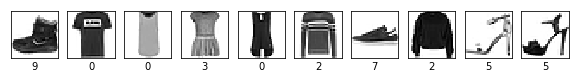

In [36]:
import matplotlib.pyplot as plt

i = 0

plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(1,10,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(trainX[i], cmap=plt.cm.binary)
    plt.xlabel(trainY[i])
    i = i + 1
plt.show()

One Hot Encoder should be applied later to see the correct names

### Build a neural Network with a cross entropy loss function and sgd optimizer in Keras. The output layer with 10 neurons as we have 10 classes.

In [39]:
# Initialize Sequential model
model1 = tf.keras.models.Sequential()

# Reshape 2 Dimentional Data to 1 Dimention -> 28x28 to 784
model1.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

# Add Dense Layer which provides 10 Outputs after applying softmax
model1.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model1.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model using model.fit()

In [40]:
model1.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 49us/sample - loss: 2053.2789 - accuracy: 0.7405 - val_loss: 1629.5523 - val_accuracy: 0.7494
Epoch 2/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1605.1419 - accuracy: 0.7783 - val_loss: 3111.4105 - val_accuracy: 0.6829
Epoch 3/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1537.9767 - accuracy: 0.7855 - val_loss: 1694.7131 - val_accuracy: 0.7930
Epoch 4/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1468.2496 - accuracy: 0.7906 - val_loss: 1369.2705 - val_accuracy: 0.7737
Epoch 5/5
60000/60000 [==============================] - 3s 42us/sample - loss: 1492.8916 - accuracy: 0.7917 - val_loss: 870.7964 - val_accuracy: 0.8350


### In the above Neural Network model add Batch Normalization layer after the input layer and repeat the steps.

In [41]:
#Initialize Sequential model
model2 = tf.keras.models.Sequential()

# Reshape 2 Dimentional Data to 1 Dimention -> 28x28 to 784
model2.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model2.add(tf.keras.layers.BatchNormalization())


# Add Dense Layer which provides 10 Outputs after applying softmax
model2.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
model2.compile(optimizer='sgd', loss='categorical_crossentropy', metrics=['accuracy'])

### Execute the model

In [42]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 58us/sample - loss: 0.5985 - accuracy: 0.7947 - val_loss: 0.5227 - val_accuracy: 0.8266
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4900 - accuracy: 0.8322 - val_loss: 0.4995 - val_accuracy: 0.8314
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4690 - accuracy: 0.8395 - val_loss: 0.4821 - val_accuracy: 0.8357
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4580 - accuracy: 0.8408 - val_loss: 0.4838 - val_accuracy: 0.8363
Epoch 5/5
60000/60000 [==============================] - 3s 51us/sample - loss: 0.4480 - accuracy: 0.8464 - val_loss: 0.4924 - val_accuracy: 0.8346


### Customize the learning rate to 0.001 in sgd optimizer and run the model

In [43]:
# Comile the model
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.001)
model2.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [44]:
model2.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 3s 57us/sample - loss: 0.4336 - accuracy: 0.8504 - val_loss: 0.4631 - val_accuracy: 0.8398
Epoch 2/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4309 - accuracy: 0.8514 - val_loss: 0.4620 - val_accuracy: 0.8395
Epoch 3/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4305 - accuracy: 0.8506 - val_loss: 0.4600 - val_accuracy: 0.8404
Epoch 4/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4298 - accuracy: 0.8514 - val_loss: 0.4655 - val_accuracy: 0.8407
Epoch 5/5
60000/60000 [==============================] - 3s 52us/sample - loss: 0.4299 - accuracy: 0.8510 - val_loss: 0.4657 - val_accuracy: 0.8404


### Build the Neural Network model with 3 Dense layers with 100,100,10 neurons respectively in each layer. Use cross entropy loss function and singmoid as activation in the hidden layers and softmax as activation function in the output layer. Use sgd optimizer with learning rate 0.03.

In [46]:
#Initialize Sequential model
model3 = tf.keras.models.Sequential()

# Reshape 2 Dimentional Data to 1 Dimention -> 28x28 to 784
model3.add(tf.keras.layers.Reshape((784,),input_shape=(28,28,)))

#Normalize the data
model3.add(tf.keras.layers.BatchNormalization())


#Add 1st hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

#Add 2nd hidden layer
model3.add(tf.keras.layers.Dense(100, activation='sigmoid'))

# Add Dense Layer which provides 10 Outputs after applying softmax
model3.add(tf.keras.layers.Dense(10, activation='softmax'))

# Comile the model
#Create optimizer with non-default learning rate
sgd_optimizer = tf.keras.optimizers.SGD(lr=0.03)
model3.compile(optimizer=sgd_optimizer, loss='categorical_crossentropy', metrics=['accuracy'])

In [47]:
model3.fit(trainX,trainY,          
          validation_data=(testX,testY),
          epochs=5,
          batch_size=32)

Train on 60000 samples, validate on 10000 samples
Epoch 1/5
60000/60000 [==============================] - 5s 83us/sample - loss: 1.0559 - accuracy: 0.6816 - val_loss: 0.6364 - val_accuracy: 0.7739
Epoch 2/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.5712 - accuracy: 0.7980 - val_loss: 0.5127 - val_accuracy: 0.8148
Epoch 3/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4931 - accuracy: 0.8246 - val_loss: 0.4711 - val_accuracy: 0.8323
Epoch 4/5
60000/60000 [==============================] - 5s 77us/sample - loss: 0.4548 - accuracy: 0.8380 - val_loss: 0.4444 - val_accuracy: 0.8381
Epoch 5/5
60000/60000 [==============================] - 5s 76us/sample - loss: 0.4302 - accuracy: 0.8462 - val_loss: 0.4320 - val_accuracy: 0.8437


## Review model

In [48]:
model1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape (Reshape)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 10)                7850      
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [49]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_1 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 784)               3136      
_________________________________________________________________
dense_1 (Dense)              (None, 10)                7850      
Total params: 10,986
Trainable params: 9,418
Non-trainable params: 1,568
_________________________________________________________________


In [50]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
reshape_3 (Reshape)          (None, 784)               0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 784)               3136      
_________________________________________________________________
dense_5 (Dense)              (None, 100)               78500     
_________________________________________________________________
dense_6 (Dense)              (None, 100)               10100     
_________________________________________________________________
dense_7 (Dense)              (None, 10)                1010      
Total params: 92,746
Trainable params: 91,178
Non-trainable params: 1,568
_________________________________________________________________


### Run the model

In [51]:
out1 = model1.predict_classes(testX)

test_loss, test_acc = model1.evaluate(testX, testY)
print('Test accuracy model 1:', test_acc)

out2 = model2.predict_classes(testX)

test_loss, test_acc = model2.evaluate(testX, testY)
print('Test accuracy model 2:', test_acc)

out3 = model3.predict_classes(testX)

test_loss, test_acc = model3.evaluate(testX, testY)
print('Test accuracy model 3:', test_acc)

10000/10000 [==============================] - 0s 28us/sample - loss: 870.7964 - accuracy: 0.8350
('Test accuracy model 1:', 0.835)
10000/10000 [==============================] - 0s 30us/sample - loss: 0.4657 - accuracy: 0.8404
('Test accuracy model 2:', 0.8404)
10000/10000 [==============================] - 0s 37us/sample - loss: 0.4320 - accuracy: 0.8437
('Test accuracy model 3:', 0.8437)


Adding additional dense layer and increase in Learning Rate has slightly improved the model performance, we can do further parameter tuning in order to improve accuracy.